In [1]:
#This code is adapted from
#https://dashee87.github.io/football/python/predicting-football-results-with-statistical-modelling/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

import statsmodels.api as sm
import statsmodels.formula.api as smf
from pylab import rcParams

In [2]:
epl = pd.read_csv("data/epl_poisson_reg.csv")
ep = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [3]:
pl = epl[:-10]
epl.mean()

HomeGoals     1.515789
AwayGoals     1.205263
HTHG          0.700000
HTAG          0.550000
HS           13.323684
               ...    
PCAHA         1.972947
MaxCAHH       2.013368
MaxCAHA       2.026921
AvgCAHH       1.936079
AvgCAHA       1.950842
Length: 98, dtype: float64

In [4]:
goal_model_data = pd.concat([epl[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])

In [ ]:
goal_model_data.tail()

,team,opponent,goals,home
375,Man United,Leicester,2,0
376,Norwich,Man City,0,0
377,Liverpool,Newcastle,3,0
378,Sheffield United,Southampton,1,0
379,Aston Villa,West Ham,1,0


In [ ]:
#Fit the model to the data
#Home advantage included
#Team and opponent as fixed effects.

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1057.7
Date:                Sun, 16 Jan 2022   Deviance:                       765.20
Time:                        21:37:04   Pearson chi2:                     655.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1957      0.202      0.967      0.334      -0.201       0.593
team[T.Aston Villa]             -0.2932      0.206     -1.424      0.154      -0.697       0.110
team[T.Bournemouth]             -0.3200      0.207     -1.544      0.123      -0.726       0.086
team[T.Brighton]                -0.3566      0.209     -1.708      0.088      -0.766       0.053
team[T.Burnley]                 -0.2628      0.203     -1.294      0.196      -0.661       0.135
team[T.Chelsea]                  0.2157      0.180      1.197      0.231      -0.137       0.569
team[T.Crystal Palace]          -0.5906      0.224     -2.636      0.008      -1.030      -0.151
team[T.Everton]                 -0.2336      0.202     -1.158      0.247      -0.629       0.162
team[T.Leicester]                0.1727      0.181      0.952      0.341      -0.183       0.528
team[T.Liverpool]                0.4031      0.172      2.339      0.019       0.065       0.741
team[T.Man City]                 0.5881      0.167      3.530      0.000       0.262       0.915
team[T.Man United]               0.1525      0.182      0.838      0.402      -0.204       0.509
team[T.Newcastle]               -0.3786      0.210     -1.799      0.072      -0.791       0.034
team[T.Norwich]                 -0.7416      0.238     -3.121      0.002      -1.207      -0.276
team[T.Sheffield United]        -0.3716      0.209     -1.780      0.075      -0.781       0.038
team[T.Southampton]             -0.0815      0.194     -0.420      0.674      -0.461       0.298
team[T.Tottenham]                0.0847      0.185      0.457      0.647      -0.279       0.448
team[T.Watford]                 -0.4266      0.214     -1.995      0.046      -0.846      -0.007
team[T.West Ham]                -0.1195      0.196     -0.610      0.542      -0.504       0.264
team[T.Wolves]                  -0.1019      0.194     -0.526      0.599      -0.482       0.278
opponent[T.Aston Villa]          0.3191      0.189      1.685      0.092      -0.052       0.690
opponent[T.Bournemouth]          0.2876      0.191      1.509      0.131      -0.086       0.661
opponent[T.Brighton]             0.1008      0.199      0.507      0.612      -0.289       0.490
opponent[T.Burnley]              0.0277      0.202      0.137      0.891      -0.369       0.424
opponent[T.Chelsea]              0.1316      0.199      0.663      0.508      -0.258       0.521
opponent[T.Crystal Palace]       0.0156      0.202      0.077      0.938      -0.381       0.412
opponent[T.Everton]              0.1423      0.197      0.722      0.470      -0.244       0.528
opponent[T.Leicester]           -0.1468      0.213     -0.689      0.491      -0.564       0.271
opponent[T.Liverpool]           -0.3459      0.226     -1.527      0.127    

In [12]:
home_team='Man City'
away_team='Chelsea'

In [17]:
#Predict for Arsenal vs. Manchester City (1 sample for demo)

home_score_rate = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':1},index=[1]))

print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Man City against Chelsea expect to score: 1    3.141604
dtype: float64
Chelsea against Man City expect to score: 1    1.450148
dtype: float64


In [20]:
#Let's just get a result

home_goals = np.random.poisson(home_score_rate)
away_goals = np.random.poisson(away_score_rate)

print(home_team + ': ' + str(home_goals[0]))
print(away_team + ': '  + str(away_goals[0]))

Man City: 5
Chelsea: 2


In [31]:
# method to caluclate the goals for the match

def simulate_match(foot_model, home_goals_avg, away_goals_avg, max_goals=10):
    
    # home_goals_avg = foot_model.predict(pd.DataFrame(data={'team':homeTeam, 'opponent':awayTeam, 'home':1}, index=[1])).values[0]
    # away_goals_avg = foot_model.predict(pd.DataFrame(data={'team':awayTeam, 'opponent':homeTeam, 'home':0}, index=[1])).values[0]
    
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    

In [36]:
max_goals = 5
home_goals_avg = 1.5
away_goals_avg = 0.5
score_matrix = simulate_match(poisson_model, home_goals_avg, away_goals_avg, max_goals)

In [37]:
score_matrix

array([[1.35335283e-01, 6.76676416e-02, 1.69169104e-02, 2.81948507e-03,
        3.52435633e-04, 3.52435633e-05],
       [2.03002925e-01, 1.01501462e-01, 2.53753656e-02, 4.22922760e-03,
        5.28653450e-04, 5.28653450e-05],
       [1.52252194e-01, 7.61260968e-02, 1.90315242e-02, 3.17192070e-03,
        3.96490088e-04, 3.96490088e-05],
       [7.61260968e-02, 3.80630484e-02, 9.51576210e-03, 1.58596035e-03,
        1.98245044e-04, 1.98245044e-05],
       [2.85472863e-02, 1.42736432e-02, 3.56841079e-03, 5.94735131e-04,
        7.43418914e-05, 7.43418914e-06],
       [8.56418589e-03, 4.28209295e-03, 1.07052324e-03, 1.78420539e-04,
        2.23025674e-05, 2.23025674e-06]])

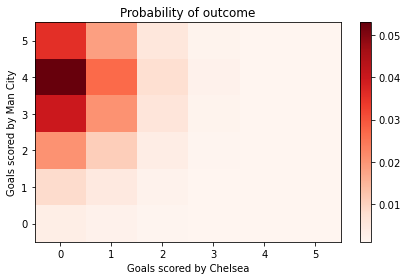

In [38]:
#Make 2d histogram of results

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Probability of outcome')
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
fig.colorbar(pos, ax=ax)

pos = ax.imshow(score_matrix, extent=[-0.5,max_goals+0.5,-0.5,max_goals+0.5], aspect='auto',cmap=plt.cm.Reds)

plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
plt.show()

# fig.savefig('output/2DOutcomes.pdf' , dpi=None, bbox_inches="tight")

In [40]:
# Home, draw, away probabilities

homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print('home_win = ', homewin*100, '%')
print('away_win = ', awaywin*100, '%')
print('draw = ', draw*100, '%')

home_win =  61.61877232134961 %
away_win =  12.1811391824803 %
draw =  25.753080236781905 %
